# Тестовое задание 

Есть датасэт https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page о такси в Нью-Йорке.

Используйте данные за декабрь 2019 и январь 2020 года.

Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?

Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

Из данных постройте модель, которая описывает тариф (т.е. стоимость поездки от других факторов).

Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.

### Примечание

Буду отвечать на вопросы не в порядке поступления, потому что считаю, что сначала нужно избавится от аномальных значений, затем можно проверить вид распределения нужного признака, а потом провести корреляционный анализ.

## Знакомство с данными

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Загрузим датасеты:

In [2]:
yellow_tripdata_1 = pd.read_csv('yellow_tripdata_2019-12.csv', low_memory=False)
yellow_tripdata_2 = pd.read_csv('yellow_tripdata_2020-01.csv', low_memory=False)

In [3]:
green_tripdata_1 = pd.read_csv('green_tripdata_2019-12.csv', low_memory=False)
green_tripdata_2 = pd.read_csv('green_tripdata_2020-01.csv', low_memory=False)

Создадим список с названиями датасетов для удобства

In [4]:
dataframes = ['yellow_tripdata_1', 'yellow_tripdata_2', 'green_tripdata_1', 'green_tripdata_2']

Выведем первые строки, чтобы убедиться в корректном считывании данных:

In [5]:
yellow_tripdata_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [6]:
yellow_tripdata_2.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5


In [7]:
green_tripdata_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.5,0.5,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.0,0.5,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0


In [8]:
green_tripdata_2.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.5,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.0
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.0,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.0


### Проверим полноту данных:

In [9]:
for d in dataframes:
    n = len(locals()[d]) 
    print(d, '\t', 'строк -', n, '\n')    
    l = locals()[d].isnull().sum(axis = 0)
    for i, c in enumerate(locals()[d].columns):
        if l[i] > 0:
            print(c, '\t', "процент потерь -", l[i]*100/n, '%')
    print('\n\n')

yellow_tripdata_1 	 строк - 6896317 

VendorID 	 процент потерь - 0.7397861786225894 %
passenger_count 	 процент потерь - 0.7397861786225894 %
RatecodeID 	 процент потерь - 0.7397861786225894 %
store_and_fwd_flag 	 процент потерь - 0.7397861786225894 %
payment_type 	 процент потерь - 0.7397861786225894 %



yellow_tripdata_2 	 строк - 6405008 

VendorID 	 процент потерь - 1.0217161321266108 %
passenger_count 	 процент потерь - 1.0217161321266108 %
RatecodeID 	 процент потерь - 1.0217161321266108 %
store_and_fwd_flag 	 процент потерь - 1.0217161321266108 %
payment_type 	 процент потерь - 1.0217161321266108 %



green_tripdata_1 	 строк - 450627 

VendorID 	 процент потерь - 20.133059048836397 %
store_and_fwd_flag 	 процент потерь - 20.133059048836397 %
RatecodeID 	 процент потерь - 20.133059048836397 %
passenger_count 	 процент потерь - 20.133059048836397 %
ehail_fee 	 процент потерь - 100.0 %
improvement_surcharge 	 процент потерь - 0.00044382604681920967 %
payment_type 	 процент потер

Видим, что пропусков данных о "желтых" около процента, а о "зеленых" уже 20-25%. 

Так же датасетах о зеленых такси признак ehail_fee не несет никакой информации, а в датасетах о желтых такси он отсутствует, поэтому удалим этот признак (когда будем готовить итоговый датасет).

Cтолбцы в датасетах для желтого и зеленого такси отличаются:

In [10]:
for d in dataframes:
    print(d, locals()[d].shape)

yellow_tripdata_1 (6896317, 18)
yellow_tripdata_2 (6405008, 18)
green_tripdata_1 (450627, 20)
green_tripdata_2 (447770, 20)


Найдем столбцы в которых есть изменения:

In [11]:
list(set(green_tripdata_1) - set(yellow_tripdata_1)) + list(set(yellow_tripdata_1) - set(green_tripdata_1))

['trip_type',
 'lpep_dropoff_datetime',
 'lpep_pickup_datetime',
 'ehail_fee',
 'tpep_dropoff_datetime',
 'tpep_pickup_datetime']

Судя по data_dictionary (pdf в папке проекта) lpep = tpep, поэтому разница в trip_type и ehail_fee

trip_type - A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
1= Street-hail
2= Dispatch

Насколько я понял, подавляющая часть поездок на желтых такси совершается без предварительного заказа, поэтому добавим признак (1) к "желтым", иначе потеряется информация для "зеленых".

## Объединение с данных

In [12]:
green_tripdata_1.drop(columns='ehail_fee', inplace = True)
green_tripdata_2.drop(columns='ehail_fee', inplace = True)

In [13]:
data_y = pd.concat([yellow_tripdata_1,yellow_tripdata_2])

In [14]:
data_g = pd.concat([green_tripdata_1,green_tripdata_2])

Что бы не терять данные, добавим признак к данным о желтых такси:

In [15]:
data_y['color'] = 1

In [16]:
data_y['trip_type'] = 1

In [17]:
data_g = data_g.rename(columns={"lpep_pickup_datetime": "tpep_pickup_datetime", "lpep_dropoff_datetime": "tpep_dropoff_datetime"})

In [18]:
data_g['color'] = 2

In [19]:
data_y.shape

(13301325, 20)

In [20]:
data_g.shape

(898397, 20)

Получаем итоговый датасет:

In [21]:
df = pd.concat([data_y, data_g])   #.dropna()

Удалим первичные датасеты из памяти

In [22]:
import gc

del [[yellow_tripdata_1, yellow_tripdata_2, green_tripdata_1, green_tripdata_2]]

gc.collect()

yellow_tripdata_1=pd.DataFrame()
yellow_tripdata_2=pd.DataFrame()
green_tripdata_1=pd.DataFrame()
green_tripdata_2=pd.DataFrame()

Проверим рамер таблицы:

In [23]:
df.shape

(14199722, 20)

In [24]:
# на всякий случай)
# df.to_csv('df.csv', index=False)
# df = pd.read_csv('df.csv', low_memory=False)

# Работа с признаками

## Выбросы  

Датасет получился довольно большим, попробуем рассмотреть только часть данных.

In [24]:
df_mini = df.sample(frac = 0.2, random_state = 42)

Посмотрим как выглядят граффики. 

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
for idx, feature in enumerate(df.columns[:-1]):
    df_mini.plot(feature, "total_amount", subplots=True, kind="scatter", c = 'blue', ax=axes[idx // 4, idx % 4])

<AxesSubplot:>

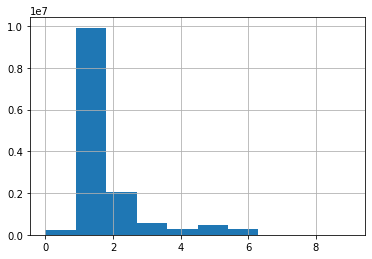

In [33]:
df.passenger_count.hist()

<AxesSubplot:>

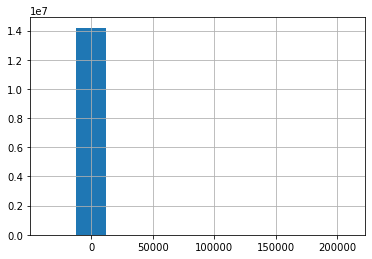

In [34]:
df.trip_distance.hist()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199722 entries, 0 to 447769
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  color                  int64  
 19  trip_type              float64
dtypes: float64(14), int64(3), object(3)
memory usage: 2.2+ GB


Данные о времени поездки не совсем подходят для содания модели:
    
    1. нужно форматировать время в datetime
    2. следует заменить "время прибытия" на "время в пути" (в минутах для удобства)
    3. добавить время начала поездки (например в секундах, или часах для удобства)
    4. создать признаки со днями недели 
    (5.) признак о выходном или праздничном дне.
    

In [25]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

df['trip_duration_m'] = (pd.to_datetime(df.tpep_dropoff_datetime) - df.tpep_pickup_datetime).dt.total_seconds()/60

In [26]:
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [27]:
df['time_of_day_h'] = df.tpep_pickup_datetime.dt.hour + df.tpep_pickup_datetime.dt.minute/60

In [28]:
df['day_of_week'] = df.tpep_pickup_datetime.dt.dayofweek

In [29]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,color,trip_type,trip_duration_m,time_of_day_h,day_of_week
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,...,0.0,0.0,0.3,18.3,2.5,1,1.0,14.783333,0.433333,6
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,...,0.0,0.0,0.3,3.8,0.0,1,1.0,0.100000,0.200000,6
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,...,0.0,0.0,0.3,3.8,0.0,1,1.0,0.183333,0.416667,6
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,...,10.0,0.0,0.3,39.8,0.0,1,1.0,21.266667,0.200000,6
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,...,0.0,0.0,0.3,12.8,2.5,1,1.0,11.083333,0.083333,6


Бинарный признак 'store_and_fwd_flag' (см. pdf) стоит представить в виде 0/1

In [30]:
df.store_and_fwd_flag[df.store_and_fwd_flag == 'Y'] = 1
df.store_and_fwd_flag[df.store_and_fwd_flag == 'N'] = 0
df.store_and_fwd_flag = pd.to_numeric(df.store_and_fwd_flag)

<ipython-input-30-9fdc3c769c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.store_and_fwd_flag[df.store_and_fwd_flag == 'Y'] = 1
<ipython-input-30-9fdc3c769c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.store_and_fwd_flag[df.store_and_fwd_flag == 'N'] = 0


In [31]:
df.store_and_fwd_flag.mean()

0.010592306251575057

In [32]:
df.info(show_counts=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199722 entries, 0 to 447769
Data columns (total 23 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   VendorID               13876487 non-null  float64       
 1   tpep_pickup_datetime   14199722 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  14199722 non-null  datetime64[ns]
 3   passenger_count        13876487 non-null  float64       
 4   trip_distance          14199722 non-null  float64       
 5   RatecodeID             13876487 non-null  float64       
 6   store_and_fwd_flag     13876487 non-null  float64       
 7   PULocationID           14199722 non-null  int64         
 8   DOLocationID           14199722 non-null  int64         
 9   payment_type           13876487 non-null  float64       
 10  fare_amount            14199722 non-null  float64       
 11  extra                  14199722 non-null  float64       
 12  mta_tax       

Избавимся от пропусков в данных. Для экономии времени удалим. 

In [33]:
df = df.dropna()

In [39]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,color,trip_type,trip_duration_m,time_of_day_h,day_of_week
count,1.387649e+07,1.387649e+07,1.419972e+07,1.387649e+07,1.387649e+07,1.419972e+07,1.419972e+07,1.387649e+07,1.419972e+07,1.419972e+07,...,1.419972e+07,1.419972e+07,1.419972e+07,1.419972e+07,1.399294e+07,1.419972e+07,1.399294e+07,1.419972e+07,1.419972e+07,1.419972e+07
mean,1.676152e+00,1.522533e+00,2.988380e+00,1.064904e+00,1.059231e-02,1.606058e+02,1.599411e+02,1.294178e+00,1.332032e+01,1.096154e+00,...,2.136177e+00,3.653542e-01,2.967722e-01,1.914813e+01,2.185162e+00,1.063269e+00,1.001143e+00,1.751987e+01,1.438024e+01,2.967157e+00
std,4.679428e-01,1.155383e+00,6.071141e+01,8.656669e-01,1.023724e-01,6.755468e+01,7.100643e+01,4.850968e-01,1.064795e+02,1.255241e+00,...,2.805626e+00,1.721852e+00,3.865993e-02,1.068156e+02,8.498497e-01,2.434455e-01,3.379430e-02,6.783612e+01,5.933807e+00,1.937867e+00
min,1.000000e+00,0.000000e+00,-3.726453e+04,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.472000e+03,-2.700000e+01,...,-2.008000e+02,-4.050000e+01,-3.000000e-01,-1.472800e+03,-2.750000e+00,1.000000e+00,1.000000e+00,-5.779467e+03,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,0.000000e+00,1.130000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,1.000000e+00,1.000000e+00,6.616667e+00,1.033333e+01,1.000000e+00
50%,2.000000e+00,1.000000e+00,1.620000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,...,1.850000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00,1.000000e+00,1.000000e+00,1.111667e+01,1.500000e+01,3.000000e+00
75%,2.000000e+00,2.000000e+00,3.060000e+00,1.000000e+00,0.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,2.500000e+00,...,2.860000e+00,0.000000e+00,3.000000e-01,2.080000e+01,2.500000e+00,1.000000e+00,1.000000e+00,1.830000e+01,1.913333e+01,5.000000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,5.000000e+00,3.984684e+05,1.130100e+02,...,1.100000e+03,9.105000e+02,3.000000e-01,3.984712e+05,3.000000e+00,2.000000e+00,2.000000e+00,8.525117e+03,2.398333e+01,6.000000e+00


## Визуализируем данные

<AxesSubplot:>

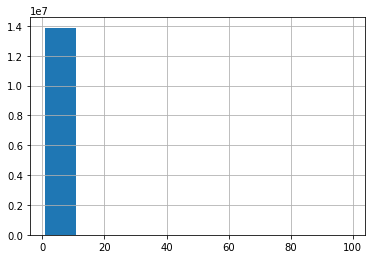

In [40]:
df.RatecodeID.hist()

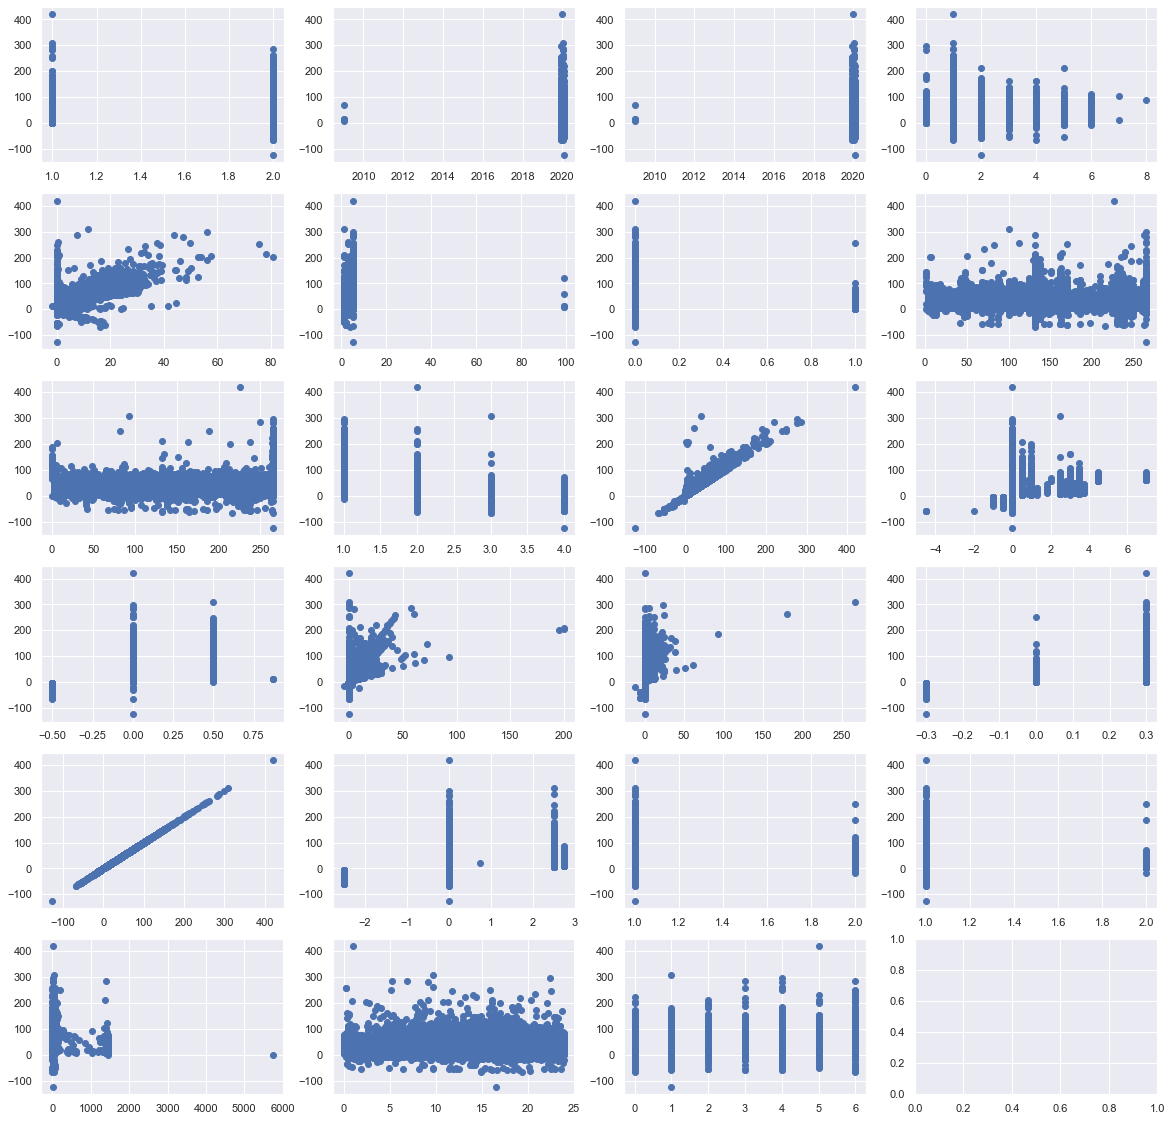

In [69]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
for idx, feature in enumerate(df.columns):
    axs[idx // 4, idx % 4].scatter(df_mini[feature], df_mini.total_amount)
plt.show()

In [43]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,color,trip_type,trip_duration_m,time_of_day_h,day_of_week
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,0.0,142,116,2.0,...,0.0,0.0,0.3,18.3,2.5,1,1.0,14.783333,0.433333,6
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,0.0,145,145,2.0,...,0.0,0.0,0.3,3.8,0.0,1,1.0,0.100000,0.200000,6
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,0.0,145,145,2.0,...,0.0,0.0,0.3,3.8,0.0,1,1.0,0.183333,0.416667,6
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,0.0,138,25,1.0,...,10.0,0.0,0.3,39.8,0.0,1,1.0,21.266667,0.200000,6
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,0.0,161,237,2.0,...,0.0,0.0,0.3,12.8,2.5,1,1.0,11.083333,0.083333,6


In [46]:
df_mini.drop(columns = ['tpep_pickup_datetime' ,'tpep_dropoff_datetime']).head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,color,trip_type,trip_duration_m,time_of_day_h,day_of_week
2030010,2.0,1.0,1.03,1.0,0.0,164,233,1.0,8.0,0.0,...,2.26,0.0,0.3,13.56,2.5,1,1.0,11.100000,15.866667,0
3354181,2.0,1.0,3.37,1.0,0.0,13,186,1.0,13.0,1.0,...,3.46,0.0,0.3,20.76,2.5,1,1.0,14.433333,18.983333,4
5461753,2.0,1.0,4.71,1.0,0.0,226,164,1.0,26.0,0.0,...,4.00,0.0,0.3,33.30,2.5,1,1.0,38.916667,9.066667,1
933976,2.0,1.0,0.53,1.0,0.0,48,163,1.0,6.5,0.0,...,1.96,0.0,0.3,11.76,2.5,1,1.0,8.516667,9.866667,3
5849720,2.0,2.0,2.23,1.0,0.0,141,170,1.0,8.5,0.5,...,2.46,0.0,0.3,14.76,2.5,1,1.0,6.716667,22.700000,2


In [49]:
corr = df.drop(columns = ['tpep_pickup_datetime' ,'tpep_dropoff_datetime']).corr()

<AxesSubplot:>

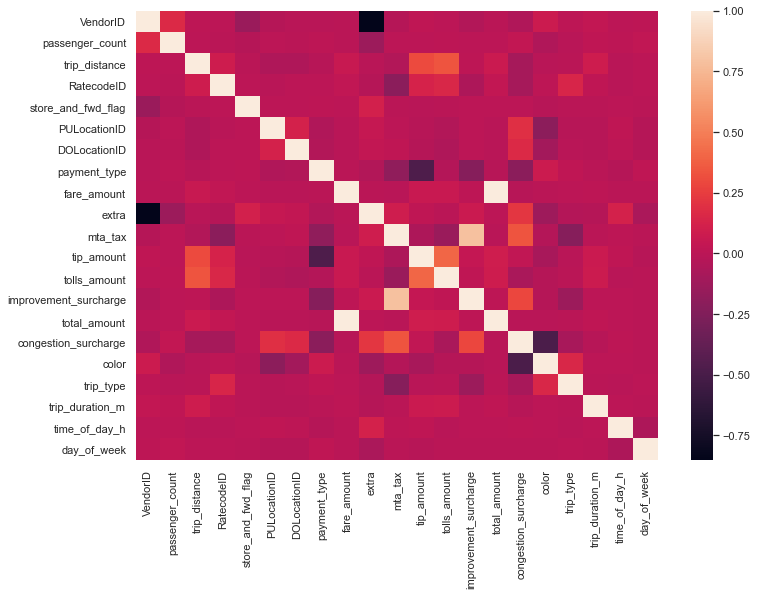

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr)

In [56]:
df.drop(columns = ['tpep_pickup_datetime' ,'tpep_dropoff_datetime']).corrwith(df['total_amount'])

VendorID                 0.001047
passenger_count          0.001734
trip_distance            0.069283
RatecodeID               0.030988
store_and_fwd_flag       0.002582
PULocationID            -0.007185
DOLocationID            -0.008318
payment_type            -0.019257
fare_amount              0.999320
extra                    0.002339
mta_tax                 -0.010330
tip_amount               0.093790
tolls_amount             0.087942
improvement_surcharge    0.014191
total_amount             1.000000
congestion_surcharge    -0.008953
color                   -0.007936
trip_type                0.000818
trip_duration_m          0.018926
time_of_day_h            0.002188
day_of_week             -0.001523
dtype: float64

In [57]:
df_mini.drop(columns = ['tpep_pickup_datetime' ,'tpep_dropoff_datetime']).corrwith(df['total_amount'])

VendorID                 0.001450
passenger_count          0.006475
trip_distance            0.396109
RatecodeID               0.132203
store_and_fwd_flag      -0.000908
PULocationID            -0.023040
DOLocationID            -0.030127
payment_type            -0.071069
fare_amount              0.448324
extra                    0.007425
mta_tax                 -0.037929
tip_amount               0.325513
tolls_amount             0.288431
improvement_surcharge    0.055096
total_amount             0.461551
congestion_surcharge    -0.023645
color                   -0.030061
trip_type                0.001134
trip_duration_m          0.063690
time_of_day_h            0.011598
day_of_week              0.000972
dtype: float64

In [38]:
df.plot('trip_distance', "total_amount", kind="scatter")

MemoryError: Unable to allocate 1.48 GiB for an array with shape (14, 14199722) and data type float64

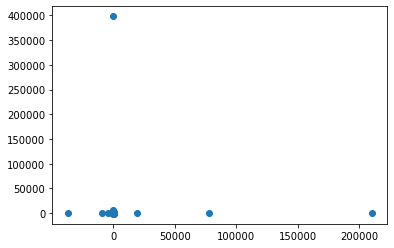

In [37]:
plt.scatter(df.trip_distance,df.total_amount)

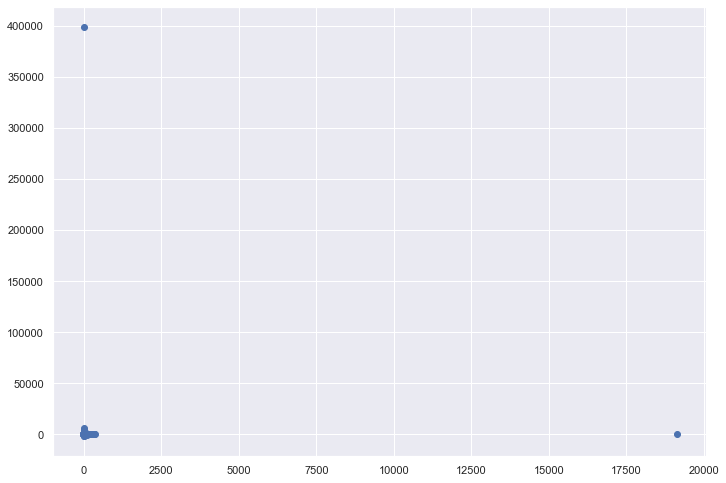

In [59]:
plt.scatter(df.trip_distance,df.total_amount)

Посмотрим на графиках, как целевой признак зависит от остальных

In [ ]:
df.plot('tpep_pickup_datetime', "total_amount", subplots=True, kind="scatter")

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "total_amount", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

KeyboardInterrupt: 